In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from palettable.colorbrewer.qualitative import Set3_12 as color_palette
import scipy

In [2]:
df = pd.read_csv('./mixing_proportions.txt', sep='\t', header=0, index_col=0)
df.fillna(0, inplace=True)
sns_df = (df*100).round(2)
sns_df

,Oil palm plantation,agricultural feature,agricultural soil,alluvial paddy field soil,animal-associated habitat,basin,bog,clay soil,coffee plantation,cultivated habitat,...,podzol,shrubland,steppe soil,surface soil,taiga,tropical soil,tundra,volcano,wetland,Unknown
#SampleID,,,,,,,,,,,,,,,,,,,,,
515rcbc8,7.35,2.92,2.50,0.48,0.07,0.31,0.07,1.22,0.48,0.48,...,0.64,0.44,0.15,0.26,0.89,1.46,2.50,1.89,9.01,39.33
515rcbc9,0.28,1.42,13.58,0.07,0.12,0.95,0.02,1.12,2.87,0.84,...,0.09,0.62,0.72,0.34,0.16,0.02,2.52,2.54,4.55,41.52
515rcbc10,0.65,0.83,7.55,0.55,0.05,0.51,0.26,3.95,2.84,0.88,...,0.36,0.84,0.33,0.42,0.26,0.15,1.38,2.02,5.70,44.43
515rcbc11,0.98,3.92,3.94,0.40,0.15,0.45,0.13,1.17,3.67,0.67,...,0.33,1.10,0.38,0.36,0.22,0.13,1.25,4.47,13.69,34.49
515rcbc12,0.30,1.82,5.86,0.28,0.02,1.05,0.06,1.08,3.75,0.46,...,0.20,0.62,0.52,0.58,0.29,0.08,1.26,0.72,3.12,50.62
515rcbc13,0.55,1.02,12.36,0.34,0.00,0.33,0.05,2.05,3.57,1.32,...,0.20,0.61,0.06,0.20,0.07,0.02,1.16,1.80,5.95,45.28
515rcbc14,0.37,1.32,9.19,0.13,0.02,0.92,0.11,1.51,4.04,2.18,...,0.14,0.82,0.28,0.35,0.17,0.03,0.61,1.38,3.61,47.10
515rcbc15,0.83,0.58,9.38,0.52,0.18,0.48,0.25,1.68,3.50,1.92,...,0.12,1.12,0.23,0.28,0.09,0.02,0.85,5.93,3.57,48.61
515rcbc16,0.95,1.57,7.49,0.27,0.13,0.65,0.27,0.91,2.21,1.35,...,0.68,0.74,0.16,0.41,0.39,0.35,3.20,4.33,8.80,38.66


In [3]:
df_std = pd.read_csv('./mixing_proportions_stds.txt', sep='\t', header=0, index_col=0)
df_std.fillna(0, inplace=True)
df_std

,Oil palm plantation,agricultural feature,agricultural soil,alluvial paddy field soil,animal-associated habitat,basin,bog,clay soil,coffee plantation,cultivated habitat,...,podzol,shrubland,steppe soil,surface soil,taiga,tropical soil,tundra,volcano,wetland,Unknown
#SampleID,,,,,,,,,,,,,,,,,,,,,
515rcbc8,0.000607,0.000495,0.000327,0.000230,0.000064,0.000084,0.000094,0.000287,0.000175,0.000248,...,0.000353,0.000069,0.000097,0.000158,0.000258,0.000198,0.000505,0.000593,0.000511,0.001726
515rcbc9,0.000154,0.000417,0.000584,0.000064,0.000093,0.000332,0.000031,0.000207,0.000645,0.000237,...,0.000096,0.000247,0.000176,0.000125,0.000111,0.000031,0.000324,0.000621,0.000347,0.001333
515rcbc10,0.000292,0.000319,0.000545,0.000205,0.000071,0.000147,0.000051,0.000590,0.000557,0.000226,...,0.000142,0.000219,0.000103,0.000236,0.000125,0.000119,0.000616,0.000528,0.000483,0.000840
515rcbc11,0.000321,0.000573,0.000652,0.000145,0.000077,0.000202,0.000109,0.000225,0.000339,0.000290,...,0.000172,0.000294,0.000148,0.000133,0.000108,0.000085,0.000241,0.000696,0.000717,0.001287
515rcbc12,0.000174,0.000478,0.000490,0.000218,0.000035,0.000273,0.000075,0.000285,0.000672,0.000231,...,0.000143,0.000190,0.000172,0.000226,0.000145,0.000064,0.000336,0.000241,0.000385,0.001384
515rcbc13,0.000203,0.000175,0.000744,0.000201,0.000000,0.000201,0.000051,0.000356,0.000569,0.000322,...,0.000158,0.000244,0.000090,0.000104,0.000080,0.000031,0.000280,0.000618,0.000505,0.000796
515rcbc14,0.000153,0.000276,0.000376,0.000098,0.000031,0.000236,0.000092,0.000482,0.000624,0.000714,...,0.000102,0.000165,0.000078,0.000216,0.000075,0.000051,0.000148,0.000374,0.000362,0.000882
515rcbc15,0.000301,0.000321,0.000624,0.000217,0.000109,0.000165,0.000109,0.000277,0.000466,0.000342,...,0.000093,0.000332,0.000150,0.000166,0.000075,0.000035,0.000211,0.001017,0.000298,0.000978
515rcbc16,0.000258,0.000294,0.000635,0.000189,0.000109,0.000183,0.000162,0.000262,0.000446,0.000413,...,0.000255,0.000325,0.000116,0.000165,0.000199,0.000125,0.000602,0.000968,0.000534,0.001249


In [4]:
def plot_heatmap(dataframe, title=False, savename=False,):
    matplotlib.rcParams.update({'font.size': 25})
    fig, ax = plt.subplots(figsize=(40,30), dpi=50)
    sns.heatmap(ax=ax, 
                data=dataframe, 
                square=True, 
                annot=True, 
                annot_kws={"size":8})
    if title:
        plt.title(title, fontsize=40)
    if savename:
        plt.savefig(savename, bbox_inches='tight')
    plt.xlabel('Source', fontsize=32)
    plt.ylabel('Sample', fontsize=32)
    plt.show()

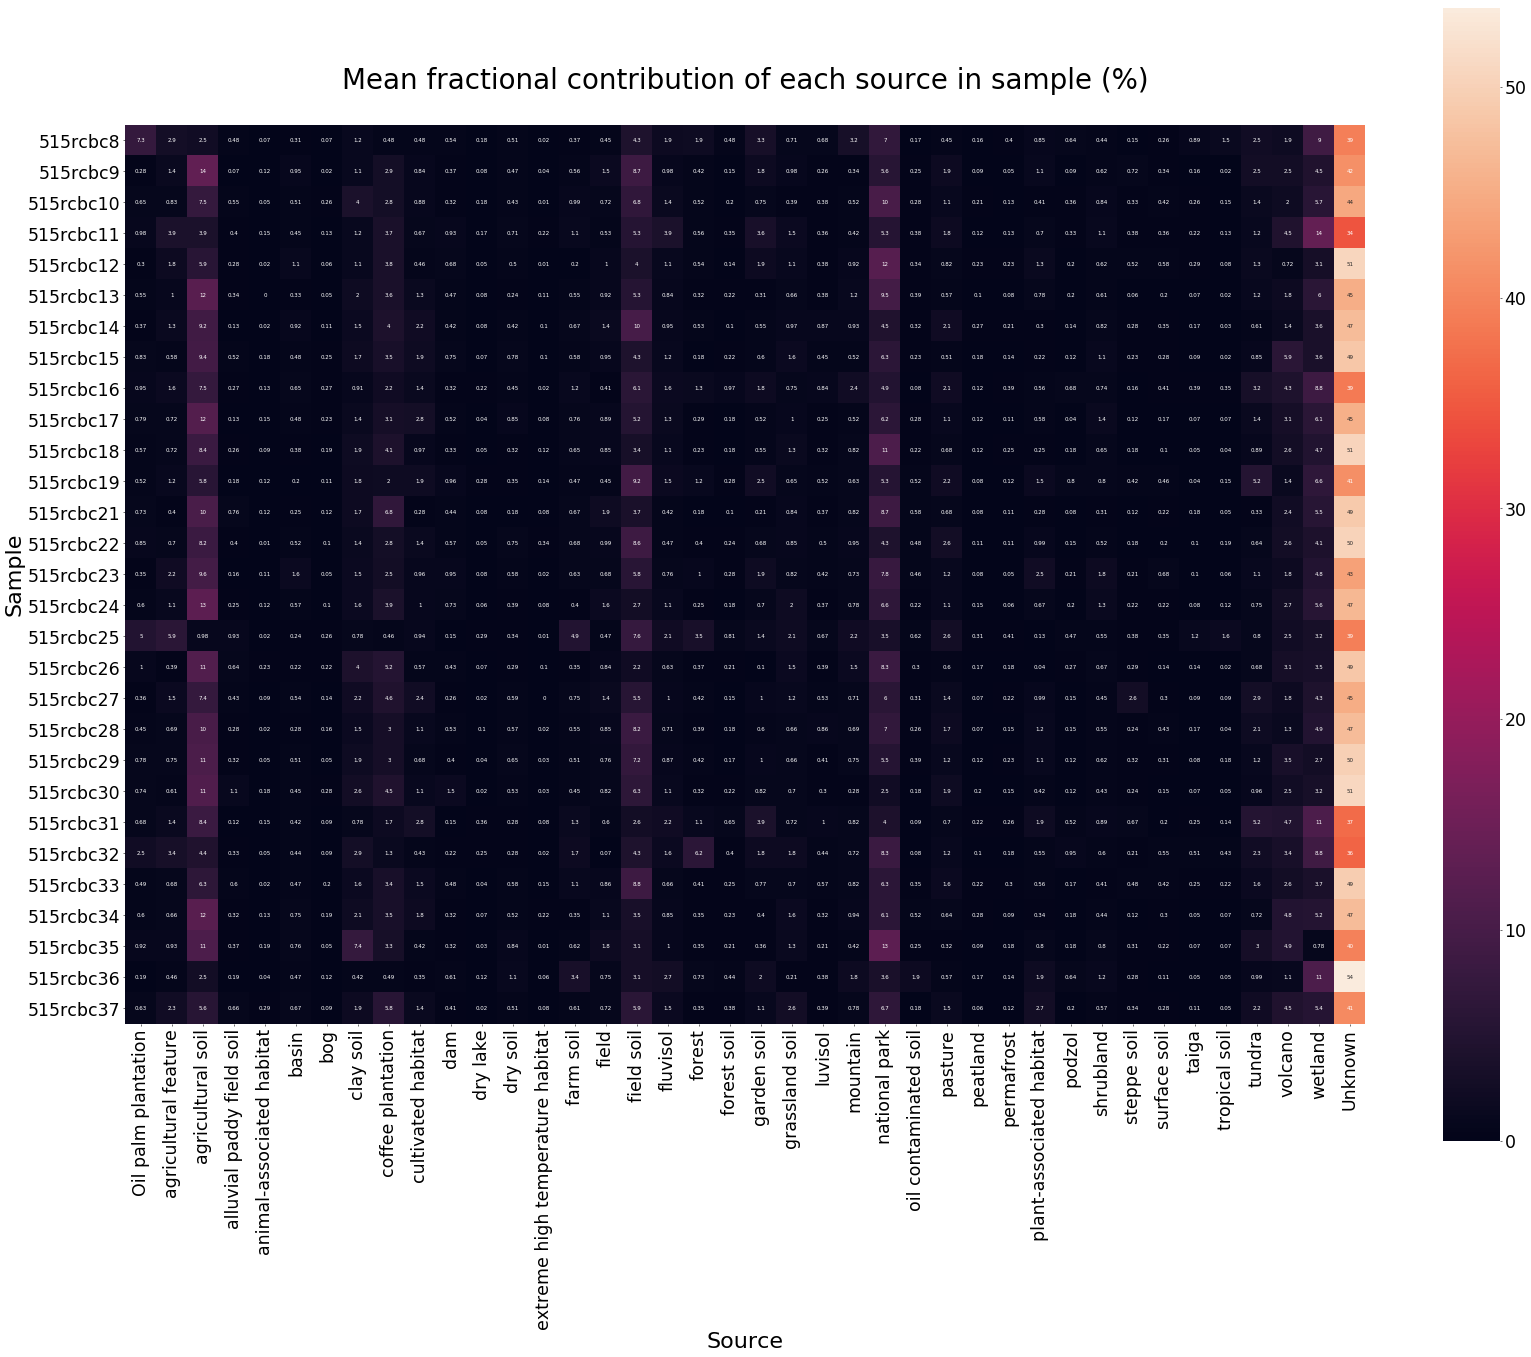

In [5]:
plot_heatmap(sns_df,
            title='Mean fractional contribution of each source in sample (%)\n',
            savename='heatmap_perc.png')

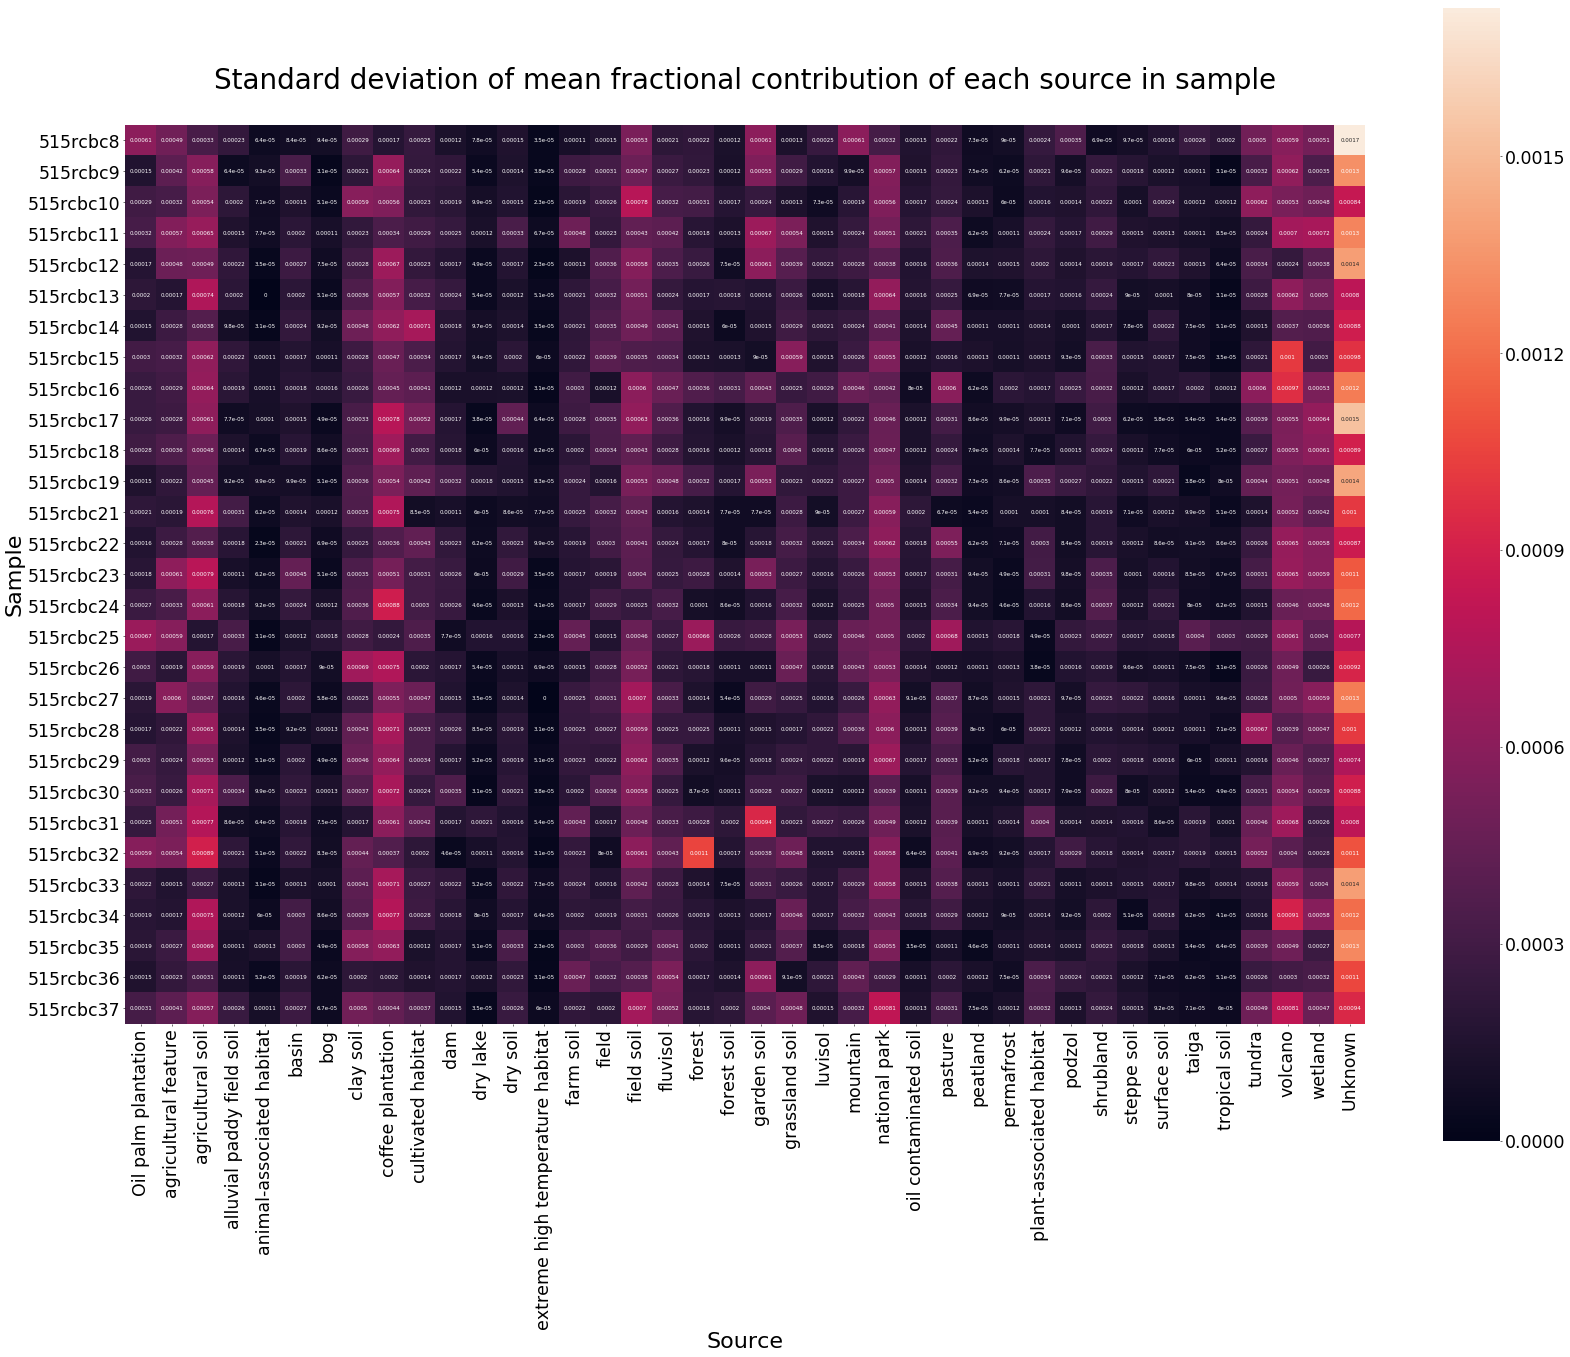

In [6]:
plot_heatmap(df_std, 
             title='Standard deviation of mean fractional contribution of each source in sample\n', 
             savename='heatmap_std.png')

In [7]:
def plot_pie_sample(sample, dataframe):
    colors = color_palette.hex_colors

#     crunch the numbers
    
    ser = dataframe.loc[sample]
    ser.sort_values(inplace=True, ascending=False)
    ser.drop(ser.index[11:], inplace=True)
    new = pd.Series(1-ser.sum(), index=['else'])
    ser = ser.append(new)
    
#     plot the graph
    
    matplotlib.rcParams.update({'font.size': 10})
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111)
    sources = ser.index
    proportions = ser.values
    w,l,p = ax.pie(proportions, startangle=90, colors=colors, autopct='%1.1f%%',
          pctdistance=1.1, labeldistance=1.3);
    ax.legend(labels=sources, loc='lower left')
    [t.set_rotation(40) for t in p]
    plt.title("Sourcetracker results for sample " + sample)
    plt.savefig('./pie_charts/' + sample + '.png', bbox_inches='tight')
    plt.show()
    

In [8]:
!mkdir pie_charts

mkdir: cannot create directory ‘pie_charts’: File exists


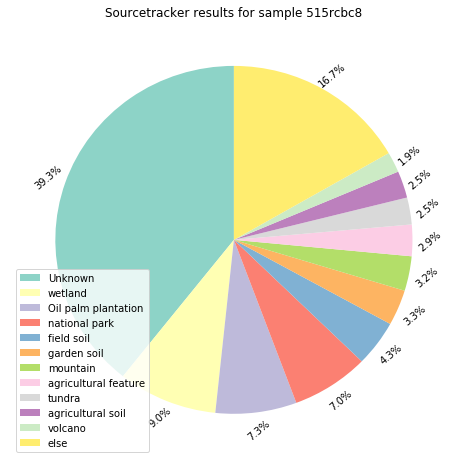

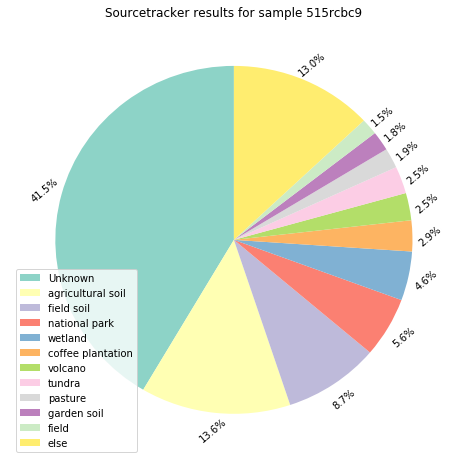

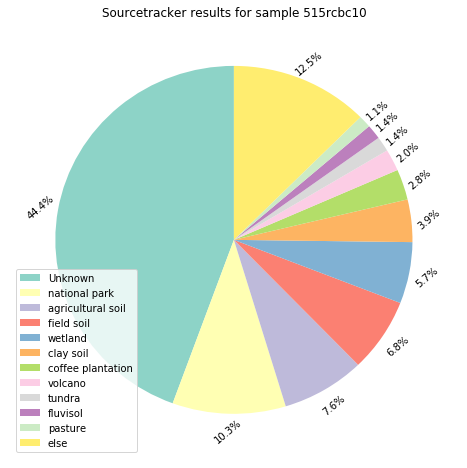

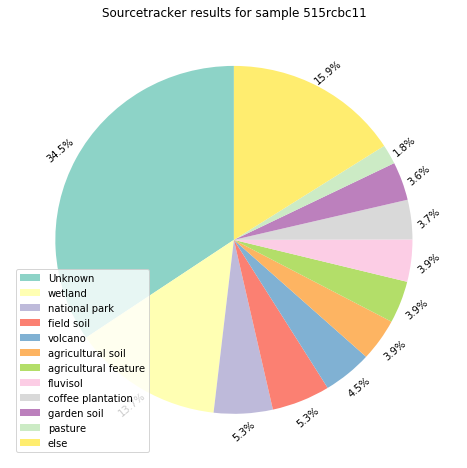

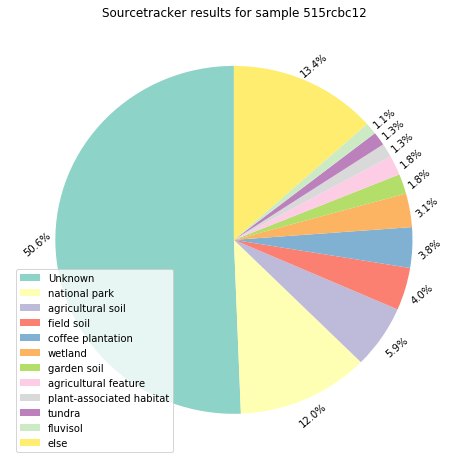

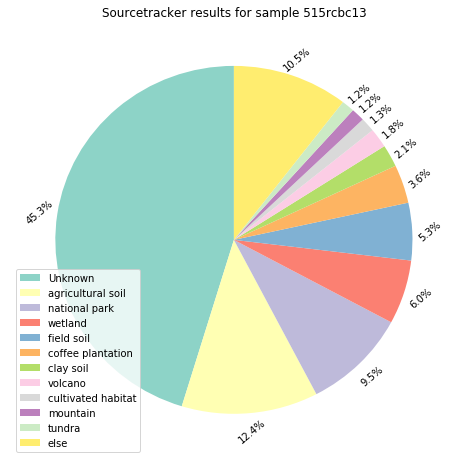

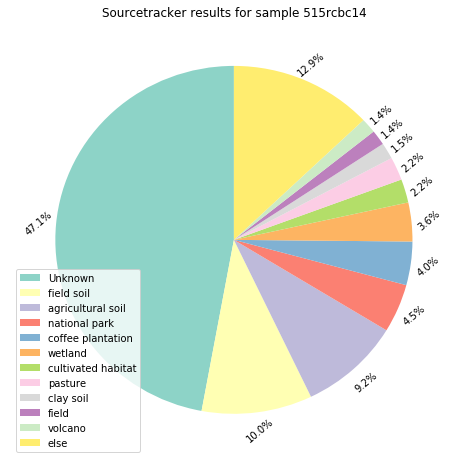

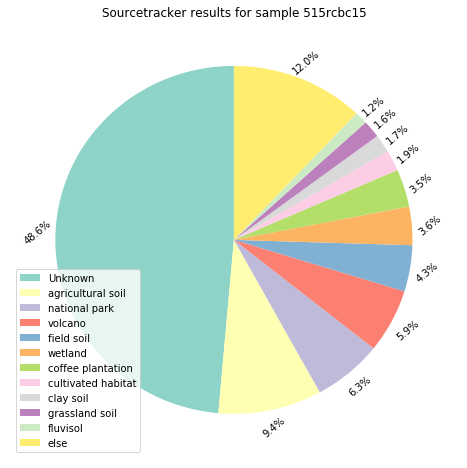

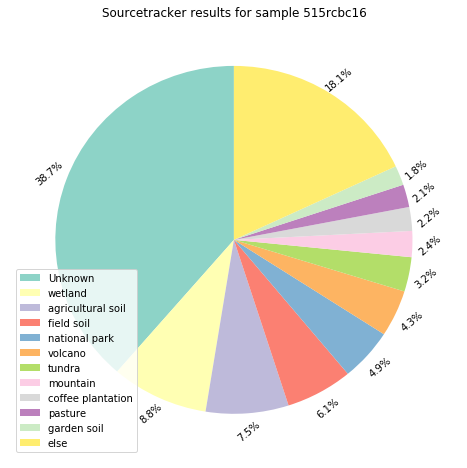

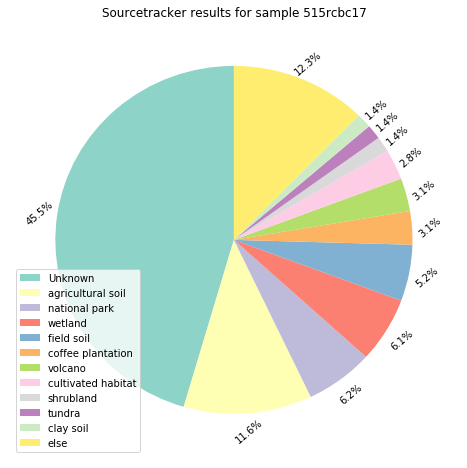

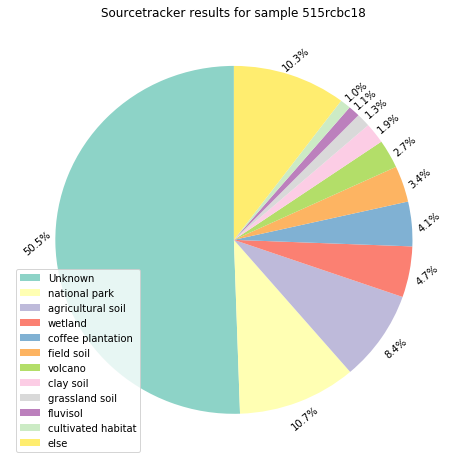

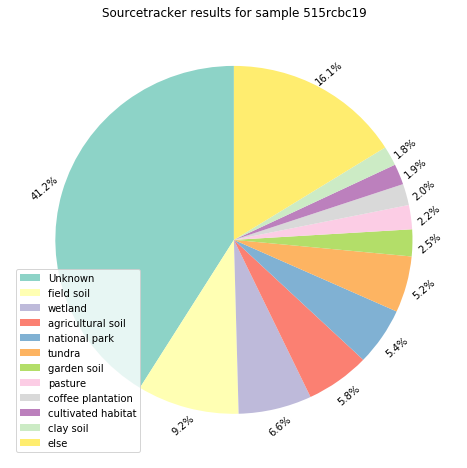

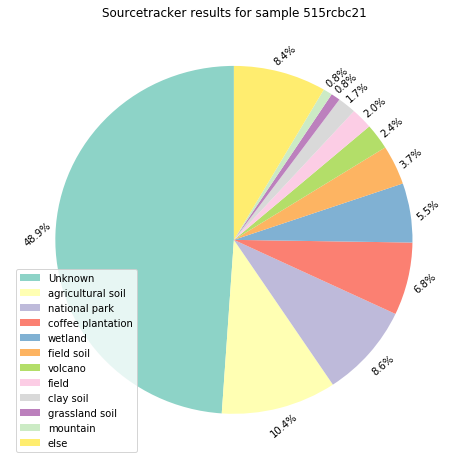

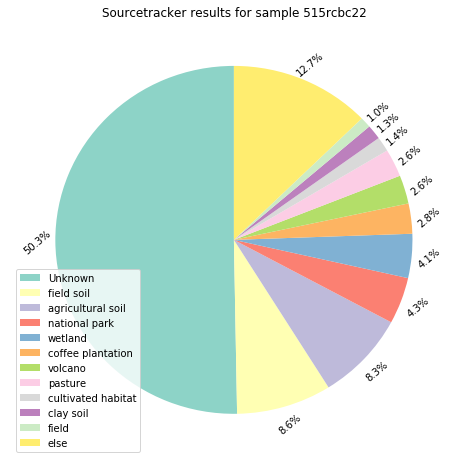

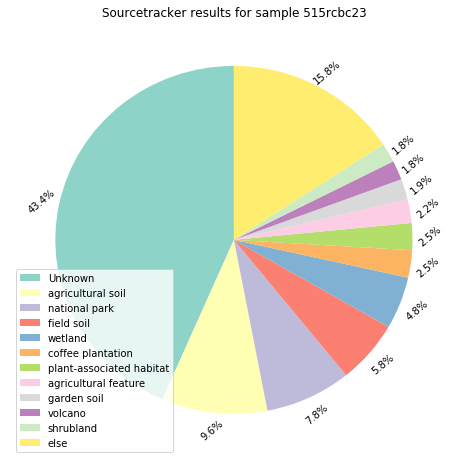

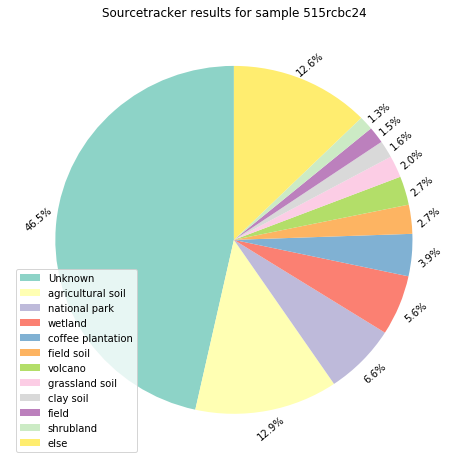

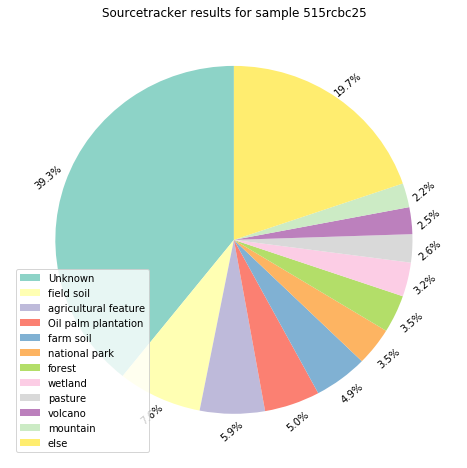

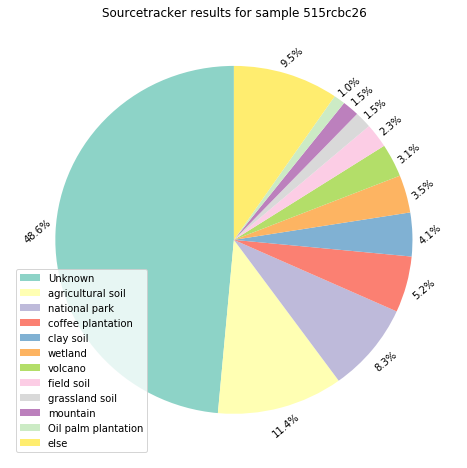

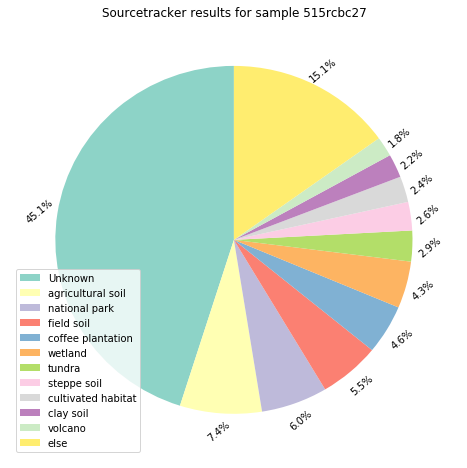

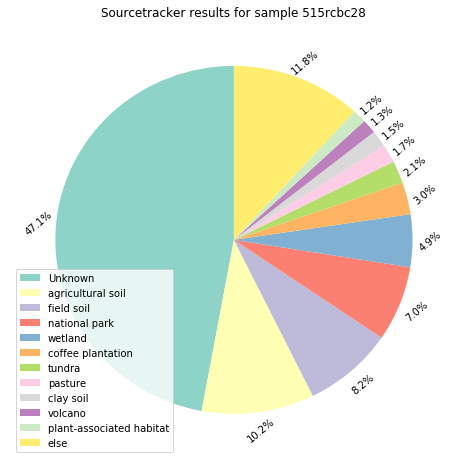

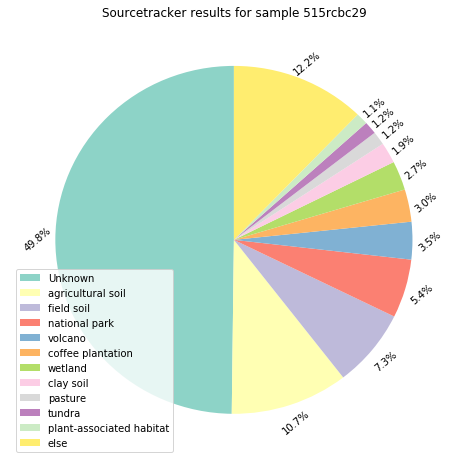

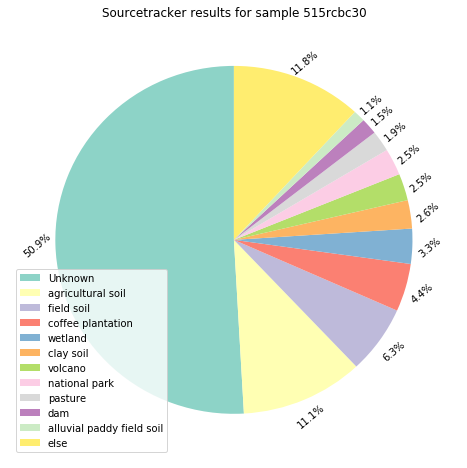

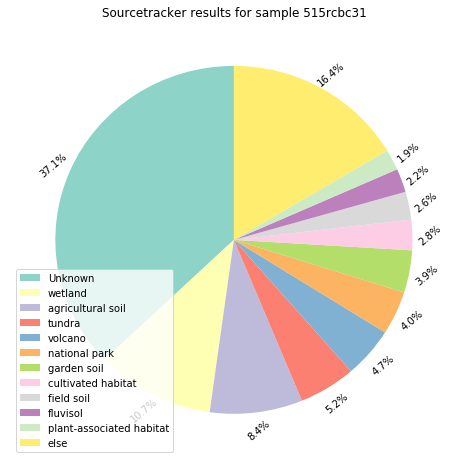

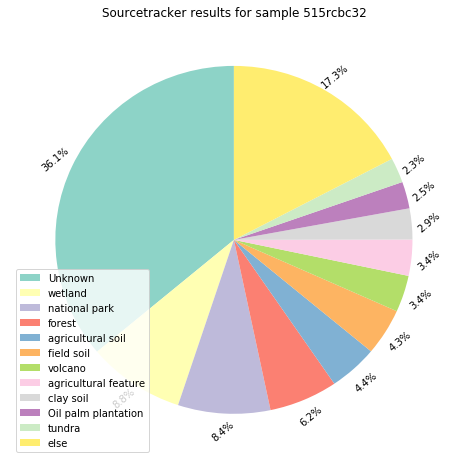

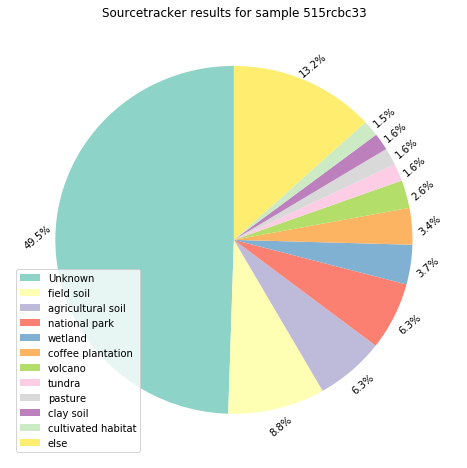

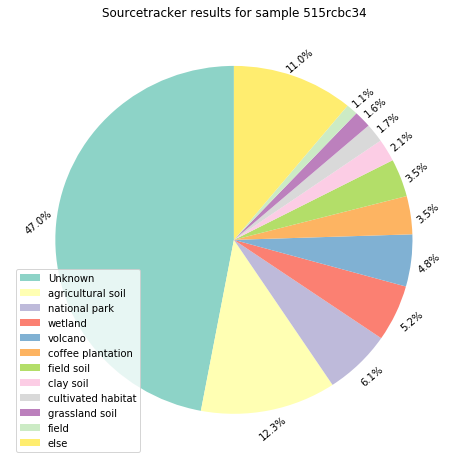

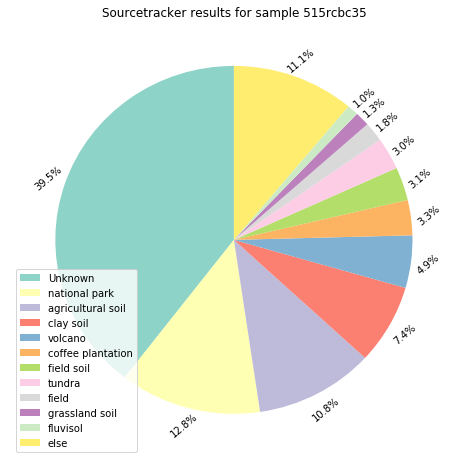

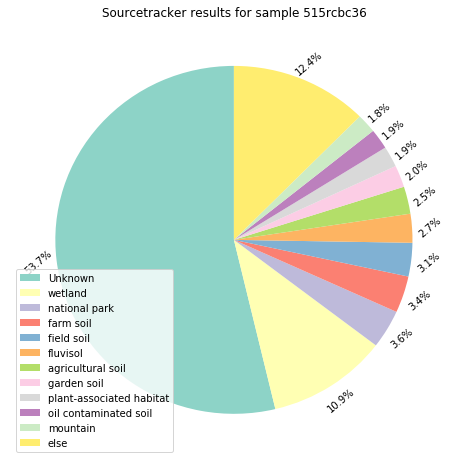

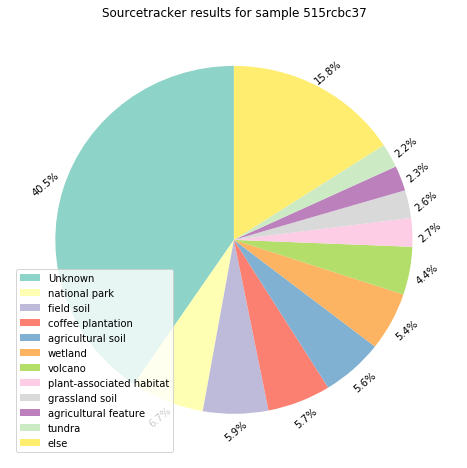

In [9]:
for samp in df.index:
    plot_pie_sample(samp, df)